In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12,6) # set figure size

# Coris data analysis
## It is well known that LDL (low density lipoprotein) is a bad cholesterol which increases the risk of coronary heart diseases (CHD). From the coris data analysis, we can show it. First we read the data and get summary statistics.

In [3]:
df = pd.read_csv('coris.txt', sep=',', skiprows=[0, 1])
df.head(2)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1


In [4]:
df['chd'] = df['chd'].astype('category')
df['chd'].value_counts()

0    302
1    160
Name: chd, dtype: int64

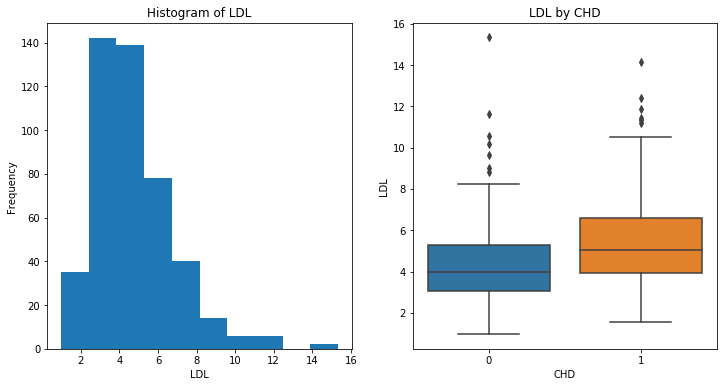

In [5]:
plt.subplot(1, 2, 1)
plt.hist(df['ldl'])
plt.xlabel('LDL')
plt.ylabel('Frequency')
plt.title('Histogram of LDL')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='chd', y='ldl')
plt.xlabel('CHD')
plt.ylabel('LDL')
plt.title('LDL by CHD');

## Get a little bit fancier plots using seaborn.

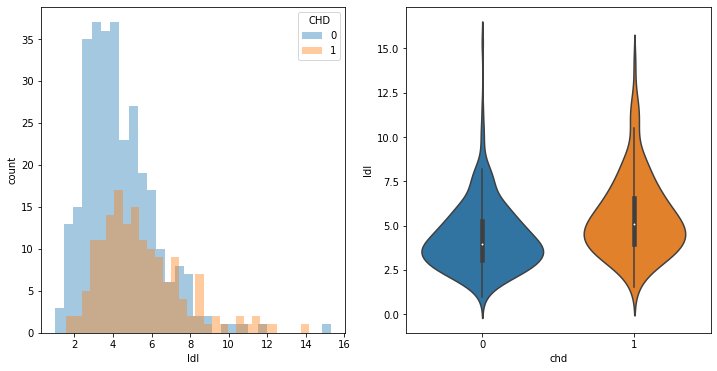

In [6]:
plt.subplot(1, 2, 1)

for i in set(df['chd']):
    sns.distplot(df[df['chd']==i]['ldl'], kde = False, bins = 30, label=i)
plt.ylabel('count')
plt.legend(title='CHD')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='chd', y='ldl', inner = 'box');

## Following shows that empirical CDF of two groups are different.

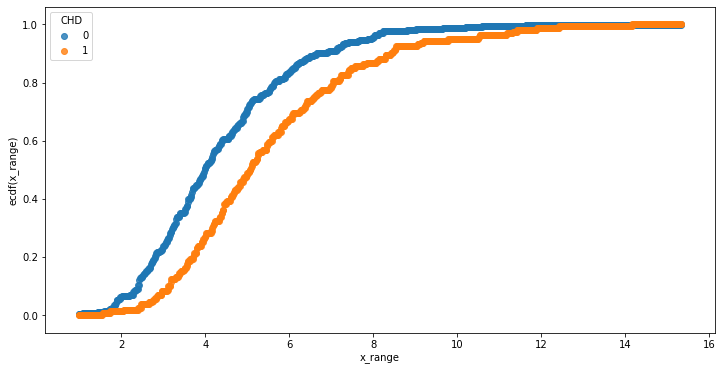

In [7]:
x_range = np.linspace(min(df['ldl']), max(df['ldl']), 1000)

for i in set(df['chd']):
    ecdf = ECDF(df[df['chd'] == i]['ldl'])
    sns.regplot(x_range, ecdf(x_range), fit_reg = False, label = i)
plt.xlabel('x_range')
plt.ylabel('ecdf(x_range)')
plt.legend(title='CHD');

## Now we get the statistics. In particular, we get the mean LDL difference between two groups and its confidence interval.

In [8]:
df0 = df[df['chd'] == 0]
df1 = df[df['chd'] == 1]
n0, n1 = len(df0), len(df1)

mu_0 = np.mean(df0['ldl'])
mu_1 = np.mean(df1['ldl'])
se_0 = np.std(df0['ldl']) / np.sqrt(n0)
se_1 = np.std(df1['ldl']) / np.sqrt(n1)

print('mu_0:', np.round(mu_0, 6))
print('mu_1:', np.round(mu_1, 6))
print('se_0:', se_0)
print('se_1:', se_1)

mu_0: 4.344238
mu_1: 5.487938
se_0: 0.1074535900297865
se_1: 0.17535689270552196


In [9]:
# Plug in estimator
T = mu_1 - mu_0
T_se = np.sqrt(se_0**2 + se_1**2)  

print('T:', T)
print('T_se:', T_se)

T: 1.1436990894039738
T_se: 0.2056606764299519


In [10]:
# 95% Interval
(T - 1.96*T_se, T + 1.96*T_se)

(0.7406041636012681, 1.5467940152066795)